In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('sea_ice_temps.txt', header=None, names=['Temp'])
df.head()


,Temp
0,15.54
1,16.31
2,16.44
3,15.46
4,14.06


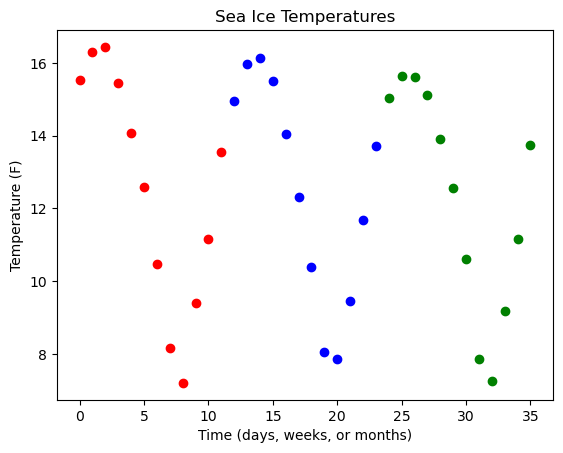

In [30]:
plt.scatter(df.index[:12], df['Temp'][:12], color='red', label='First 12')  #Example of poor programming
plt.scatter(df.index[12:24], df['Temp'][12:24], color='blue', label='Second 12')
plt.scatter(df.index[24:36], df['Temp'][24:36], color='green', label='Third 12')
plt.title('Sea Ice Temperatures')
plt.xlabel('Time (days, weeks, or months)')
plt.ylabel('Temperature (F)')
plt.show()

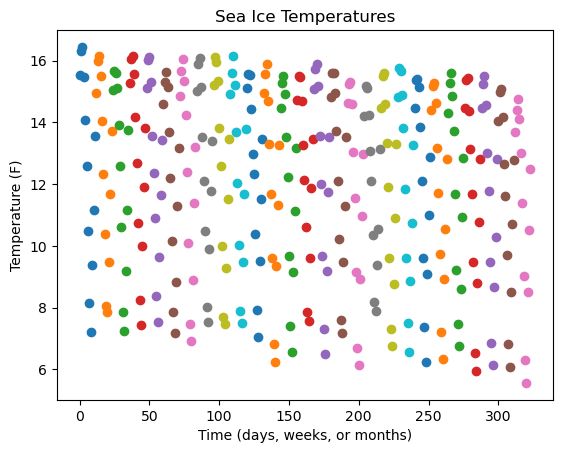

In [34]:
for i in range(0, 324, 12):
    plt.scatter(df.index[i:i+12], df['Temp'][i:i+12], label=f'{i}th 12')
plt.title('Sea Ice Temperatures')
plt.xlabel('Time (days, weeks, or months)')
plt.ylabel('Temperature (F)')
plt.show()